### Hypothesis Testing Case Study

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
print(dir(stats))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_binned_statistic', '_constants', '_continuous_distns', '_discrete_distns', '_distn_infrastructure', '_distr_params', '_multivariate', '_stats', '_stats_mstats_common', '_tukeylambda_stats', 'absolute_import', 'alpha', 'anderson', 'anderson_ksamp', 'anglit', 'ansari', 'arcsine', 'argus', 'bartlett', 'bayes_mvs', 'bernoulli', 'beta', 'betaprime', 'binned_statistic', 'binned_statistic_2d', 'binned_statistic_dd', 'binom', 'binom_test', 'boltzmann', 'boxcox', 'boxcox_llf', 'boxcox_normmax', 'boxcox_normplot', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'chi2_contingency', 'chisquare', 'circmean', 'circstd', 'circvar', 'combine_pvalues', 'contingency', 'cosine', 'crystalball', 'cumfreq', 'describe', 'dgamma', 'dirichlet', 'distributions', 'division', 'dlaplace', 'dweibull', 'energy_distance', 'entropy', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exp

# t test

`stats.ttest_1samp`  __1 sample__

`stats.ttest_rel`  __2 sample__

`stats.ttest_ind`  __Independent Sample__


In [3]:
cust=pd.read_csv("cust_seg.csv")

In [4]:
cust.head(5)

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2


In [8]:
cust.shape

(200, 10)

In [6]:
cust.Latest_mon_usage.mean()

63.17400000000001

In [7]:
cust.Latest_mon_usage.std()

11.242137352892753

### One Sample T-Test


Last year usage = 50
Present Month usage = cust.Latest_mon_usage.mean() = 63.17

**Ho** : Latest Month usage == 50

**Ha** : Latest Month Usage > 50

In [9]:
cust.Latest_mon_usage.mean()

63.17400000000001

In [10]:
?stats.ttest_1samp

In [11]:
ttest_1 = stats.ttest_1samp(a=cust.Latest_mon_usage, popmean = 50)
t_score = round(ttest_1.statistic,2)
p_value = ttest_1.pvalue

# CI : 0.95 or 95%
# alpha = 0.05
# if p value < alpha then rject NULL and 
# if it is >= alpha, we fail to reject NULL

In [12]:
print("The p value is {} and the T Score is {}".format(p_value,t_score))

The p value is 2.4963719280931583e-39 and the T Score is 16.57


In [ ]:
cust.Latest_mon_usage.mean()

In [ ]:
ttest_1

In [ ]:
# The latest month usage is significantly more than the last year usage, hence we conclude 
# that this year, there has been an increase in the credit card spent than last year

### Two Sample T-Test (Paired)

In [13]:
print("The pre campaign usage was {}".format(cust.pre_usage.mean()))
print("One month post the campaign usage is {}".format(cust.Post_usage_1month.mean()))
print("Two months post the campaign usage is {}".format(cust.post_usage_2ndmonth.mean()))

The pre campaign usage was 52.23
One month post the campaign usage is 52.775
Two months post the campaign usage is 58.05250000000003


#### Stage 1
**Ho**  : usage pre camp == 1 month usage post the camp

**Ha**  : usage pre camp != 1 month usage post the camp

In [14]:
#stats.ttest_rel(a = before, b = after)
month1 = stats.ttest_rel(a=cust.pre_usage,
                b=cust.Post_usage_1month)   

In [15]:
month1.pvalue

0.3868186820914985

In [16]:
month1.pvalue > 0.05

True

#### Stage 2
**Ho**  : pre camp == 2nd month usage post the camp

**Ha**  : pre camp != 2nd month usage post the camp

In [17]:
#stats.ttest_rel(a = before, b = after)
month2 = stats.ttest_rel(a=cust.pre_usage,
                b=cust.post_usage_2ndmonth)   

In [18]:
month2.pvalue

4.295733828012836e-16

In [19]:
month2.pvalue > 0.05

False

### Two sample T-Test (Independent)

In [20]:
Males_spend = cust.Post_usage_1month.loc[(cust.sex==0)]
FeMales_spend = cust.Post_usage_1month.loc[(cust.sex==1)]

In [21]:
print("The average spent by the male customers is ${}".format(Males_spend.mean()))
print("The average spent by the female customers is ${}".format(FeMales_spend.mean()))

The average spent by the male customers is $50.120879120879124
The average spent by the female customers is $54.99082568807339


In [22]:
uneq_var = stats.ttest_ind(a= Males_spend,
                b= FeMales_spend,
                equal_var=False)    # Unequal variance
uneq_var.statistic

-3.6564080478875276

In [23]:
eq_var = stats.ttest_ind(a= Males_spend,
                b= FeMales_spend,
                equal_var=True)    # Equal variance
eq_var.statistic

-3.7340738531536797

In [24]:
# We'll cosider equal variance since the t score is not having a huge difference
uneq_var.statistic - eq_var.statistic

0.07766580526615208

In [28]:
eq_var.pvalue > 0.05

False

### ANOVA

In [ ]:
cust.segment.value_counts()

In [30]:
s1 = cust.Latest_mon_usage.loc[cust.segment==1]
s2 = cust.Latest_mon_usage.loc[cust.segment==2]
s3 = cust.Latest_mon_usage.loc[cust.segment==3]

# Perform the ANOVA
aov = stats.f_oneway(s1, s2, s3)

In [31]:
# Statistic :  F Value
print("The f-value is {} and the p value is {}".format(aov.statistic,aov.pvalue))

The f-value is 29.279283801321778 and the p value is 7.36401083352674e-12


In [ ]:
cust.Latest_mon_usage.mean()
cust.Latest_mon_usage.std()

In [ ]:
print s1.mean(); print s2.mean(); print s3.mean()

### Chi-squre Test

In [34]:
seg_reg_xtab = pd.crosstab(cust.segment, cust.region, margins = True)
seg_reg_xtab

region,1,2,3,All
segment,,,,
1,16,20,9,45
2,19,44,42,105
3,12,31,7,50
All,47,95,58,200


In [36]:
x2test = stats.chi2_contingency(observed= seg_reg_xtab)

In [39]:
print("The chi square stat is {} and the p value is {}".format(x2test[0],x2test[1]))

The chi square stat is 16.60444164948934 and the p value is 0.055282939487992365


### Correlation

In [45]:
print(np.corrcoef(cust.Latest_mon_usage, cust.Post_usage_1month))

[[1.         0.61744926]
 [0.61744926 1.        ]]


In [43]:
print(stats.pearsonr(cust.Latest_mon_usage, cust.Post_usage_1month))

(0.6174492644854919, 2.0866647416871388e-22)


In [41]:
import seaborn as sns

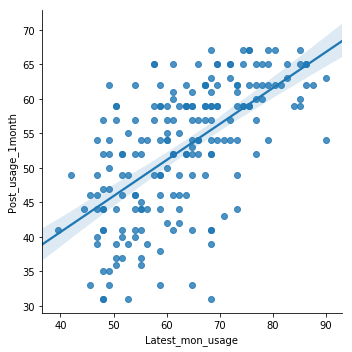

In [42]:
sns.lmplot(x = "Latest_mon_usage", y = "Post_usage_1month",data = cust)

### Simple regression

In [ ]:
sm.OLS?

In [ ]:
 statsmodels.tools.add_constant?

In [ ]:
import statsmodels.api as sm
Y = cust.Latest_mon_usage
X = sm.add_constant(cust.Post_usage_1month )
mod = sm.OLS(Y, X)
res = mod.fit()
res.summary()